In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm 

In [19]:
np.random.seed(0) # initiate the random 
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
print("X:")
print(X)
Y = [-1] * 20 + [1] * 20 # make [-1] and [1] 20 times and concatnate them 
print("Y")
print(Y)

a = np.array([1,1]) 
X_new = np.vstack((X, a)) # Stack X on top of a
print("X_new")
print(X_new)
Y_new = [-1] * 20 + [1] * 20 + [-1]

a = np.array([2,2])
X_new2 = np.vstack((X, a))
Y_new2 = [-1] * 20 + [1] * 20 + [-1]

X:
[[-0.23594765 -1.59984279]
 [-1.02126202  0.2408932 ]
 [-0.13244201 -2.97727788]
 [-1.04991158 -2.15135721]
 [-2.10321885 -1.5894015 ]
 [-1.85595643 -0.54572649]
 [-1.23896227 -1.87832498]
 [-1.55613677 -1.66632567]
 [-0.50592093 -2.20515826]
 [-1.6869323  -2.85409574]
 [-4.55298982 -1.3463814 ]
 [-1.1355638  -2.74216502]
 [ 0.26975462 -3.45436567]
 [-1.95424148 -2.18718385]
 [-0.46722079 -0.53064123]
 [-1.84505257 -1.62183748]
 [-2.88778575 -3.98079647]
 [-2.34791215 -1.84365103]
 [-0.76970932 -0.79762015]
 [-2.38732682 -2.30230275]
 [ 0.95144703  0.57998206]
 [ 0.29372981  3.9507754 ]
 [ 1.49034782  1.5619257 ]
 [ 0.74720464  2.77749036]
 [ 0.38610215  1.78725972]
 [ 1.10453344  2.3869025 ]
 [ 1.48919486  0.81936782]
 [ 1.97181777  2.42833187]
 [ 2.06651722  2.3024719 ]
 [ 1.36567791  1.63725883]
 [ 1.32753955  1.64044684]
 [ 1.18685372  0.2737174 ]
 [ 2.17742614  1.59821906]
 [ 0.36980165  2.46278226]
 [ 1.09270164  2.0519454 ]
 [ 2.72909056  2.12898291]
 [ 3.13940068  0.76517418

Text(0.5, 1.0, 'Linear Not Separable 2')

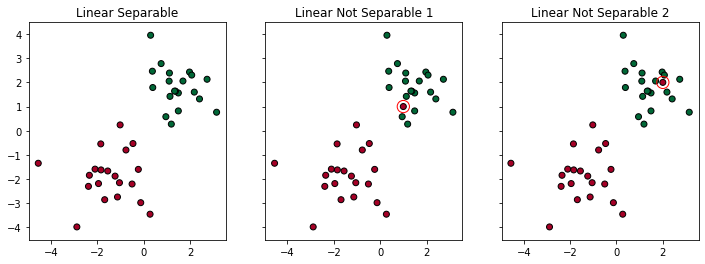

In [33]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4),sharey=True) # setting up the graph ax1, ax2, ax3

# plotting X. X[:,0] is row and X[:,1] is column
ax1.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap='RdYlGn',
                edgecolors='k')

ax1.set_title('Linear Separable')

ax2.scatter(X_new[:, 0], X_new[:, 1], c=Y_new, zorder=10, cmap='RdYlGn',
                edgecolors='k')
ax2.scatter(1, 1, s=150, facecolors='none', zorder=10, 
            edgecolors='r')

ax2.set_title('Linear Not Separable 1')

ax3.scatter(X_new2[:, 0], X_new2[:, 1], c=Y_new2, zorder=10, cmap='RdYlGn',
                edgecolors='k')
ax3.scatter(2, 2, s=150, facecolors='none', zorder=10, 
            edgecolors='r')

ax3.set_title('Linear Not Separable 2')

[1, 1]

In [32]:
a = range(1,10)
a[1:]

TypeError: range indices must be integers or slices, not tuple